Llevar una imagen cualquiera (recibida por línea de comando) a 80 colores con el método de clustering K-Means e imprima los porcentajes de estos colores en la imagen resultante. Qué aplicación le daría a este algoritmo?

In [ ]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# Modificado por: Matías Acosta <matiasacosta1995@gmail.com>
#
# License: BSD 3 clause
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

/home/matias/Envs/final_fundamentos/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/matias/Envs/final_fundamentos/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


Fitting model on a small sub-sample of the data
done in 0.463s.
Predicting color indices on the full image (k-means)
done in 0.275s.
Predicting color indices on the full image (random)
done in 0.266s.


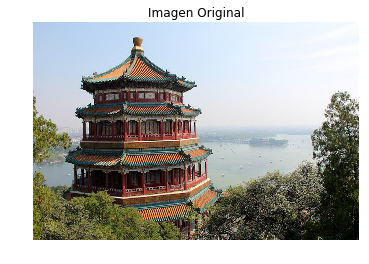

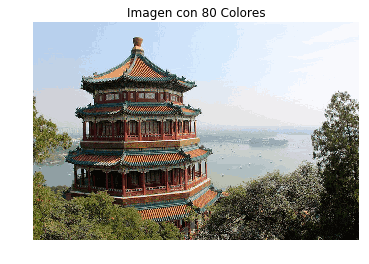

In [3]:
n_colors = 80 # Se definen la cantidad de colores que debe tener la imagen.

# Cargamos la foto necesaria
china = load_sample_image("china.jpg")

china = np.array(china, dtype=np.float64) / 255
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagen Original')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagen con 80 Colores')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

La utilización de esta tecnica se suele realizar cuando es necesario reducir el tamaño de una imagen, por ejemplo en los GIF.

Aplicar el método de Mean-Shift sobre el dataset  IRIS.

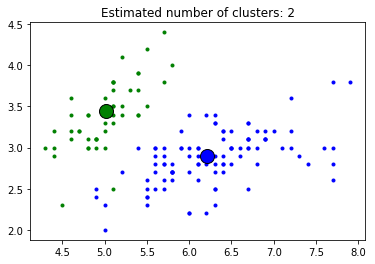

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import MeanShift
from itertools import cycle

dataset = load_iris()

ms = MeanShift()
ms.fit(dataset.data)

labels = ms.labels_

cluster_centers = ms.cluster_centers_
 
n_clusters_ = labels.max()+1
 
#%% Plot result
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(dataset.data[my_members, 0], dataset.data[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1],
             'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()